In [2]:
#Import Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Import Data and Calculate Covariance Matrix

swappath=r'C:\Users\sl.fi\OneDrive - CBS - Copenhagen Business School\Desktop\Coding School\US Inflation Swaps.xlsx'
swaps = pd.read_excel(swappath)
swaps.set_index('Date', inplace=True)
swaps =swaps[(swaps.index >= '2009-01-01') & (swaps.index <= '2023-12-01')]
covmatrix=pd.DataFrame(np.cov(swaps.T), 
index=swaps.columns, columns=swaps.columns)

In [7]:
covmatrix.round(2)

,1,2,3,4,5,6,7,8,9,10,12,15,20,25,30,40,50
1,1.77,1.18,0.95,0.81,0.72,0.65,0.60,0.55,0.52,0.48,0.44,0.40,0.36,0.34,0.32,0.33,0.34
2,1.18,0.82,0.67,0.59,0.53,0.48,0.45,0.42,0.40,0.38,0.35,0.32,0.29,0.27,0.26,0.27,0.28
3,0.95,0.67,0.56,0.50,0.45,0.42,0.39,0.37,0.35,0.34,0.31,0.29,0.26,0.25,0.24,0.24,0.25
4,0.81,0.59,0.50,0.45,0.41,0.38,0.36,0.34,0.33,0.31,0.29,0.27,0.25,0.23,0.22,0.23,0.23
5,0.72,0.53,0.45,0.41,0.38,0.36,0.34,0.32,0.31,0.30,0.28,0.26,0.24,0.22,0.21,0.22,0.22
6,0.65,0.48,0.42,0.38,0.36,0.34,0.32,0.31,0.30,0.29,0.27,0.25,0.23,0.22,0.21,0.21,0.22
7,0.60,0.45,0.39,0.36,0.34,0.32,0.31,0.30,0.29,0.28,0.26,0.24,0.22,0.21,0.20,0.21,0.21
8,0.55,0.42,0.37,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.25,0.24,0.22,0.21,0.20,0.20,0.21
9,0.52,0.40,0.35,0.33,0.31,0.30,0.29,0.28,0.27,0.26,0.25,0.23,0.21,0.20,0.20,0.20,0.20
10,0.48,0.38,0.34,0.31,0.30,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.21,0.20,0.19,0.20,0.20


In [11]:
#Summary Statistics
stats=swaps.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
1,3892.0,1.544466,1.331860,-0.8475,0.825000,1.2655,1.830000,8.6300
2,3892.0,1.460904,0.904173,-0.3400,0.900000,1.3275,1.726375,5.4350
3,3892.0,1.467452,0.750474,-0.1188,0.965975,1.3700,1.774250,4.3200
4,3892.0,1.494081,0.667137,-0.0050,1.028950,1.4138,1.857625,3.7500
5,3892.0,1.528138,0.614669,0.0925,1.080000,1.4511,1.910250,3.4388
6,3892.0,1.565775,0.581195,0.1668,1.122875,1.4850,1.958350,3.2888
7,3892.0,1.606514,0.555727,0.2300,1.174000,1.5220,2.005000,3.1738
8,3892.0,1.648603,0.536322,0.2929,1.223775,1.5700,2.055000,3.0790
9,3892.0,1.690129,0.519400,0.3500,1.277500,1.6100,2.097125,3.0020
10,3892.0,1.728299,0.503333,0.4050,1.335000,1.6790,2.135000,2.9500


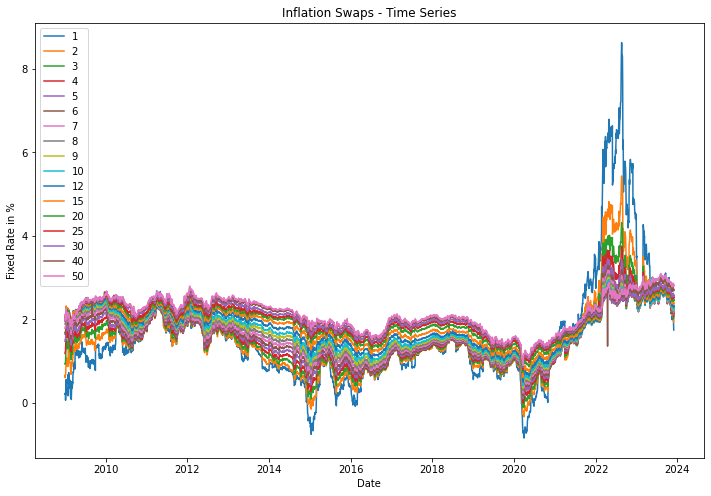

In [12]:
#Plot Swap Time Series over Time
plt.figure(figsize=(12, 8))
plt.plot(swaps, label=swaps.columns)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Fixed Rate in %')
plt.legend(loc='upper left')

(0.0, 2.8788198021582736)

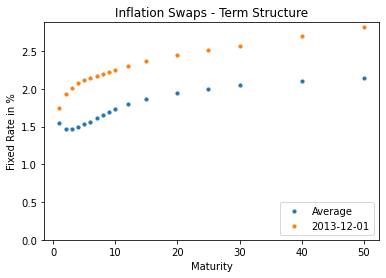

In [13]:
#Plot Average Swap Curve
plt.scatter(stats.index,stats['mean'], label='Average', s=10)
plt.scatter(swaps.columns, swaps.iloc[-1], label='2013-12-01', s=10)
plt.xlabel('Maturity')
plt.ylabel('Fixed Rate in %')
plt.legend(loc='lower right')
plt.ylim(bottom=0)

In [14]:
#Finding Eigenvalues and Eigenvectors
EVA, EVE = np.linalg.eig(covmatrix)

#Explained Variance per Principal Component
explained_variance=pd.DataFrame(EVA)/pd.DataFrame(EVA).sum()
explained_variance.index = range(1, len(explained_variance) + 1)
explained_variance.columns=['Explained Variance']
explained_variance

,Explained Variance
1,0.890125
2,0.100883
3,0.006962
4,0.001464
5,0.000223
6,0.000112
7,0.000083
8,0.000053
9,0.000044
10,0.000017


In [ ]:
#Calculate PCs
principal_components = swaps.dot(EVE)

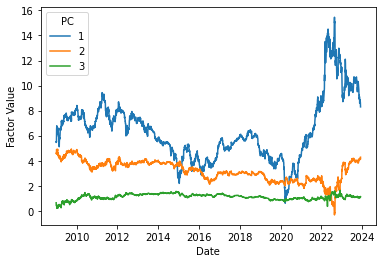

In [20]:
#Plot PC TimeSeries
principal_components = swaps.dot(EVE)
principal_components.columns=swaps.columns
principal_components.index = swaps.index
plt.plot(principal_components.iloc[:,0:1]*(-1)) #Since the sign of the Eigenvector is ambiguous, we can multiply the the PC by (-1) for plotting
plt.plot(principal_components.iloc[:,1:2])
plt.plot(principal_components.iloc[:,2:3])
plt.legend(principal_components.iloc[:,0:3].columns, title="PC")
plt.xlabel('Date')
plt.ylabel('Factor Value')
plt.show()

In [28]:
# Calculate Original Dataset - This serves as a CrossCheck
principal_components.columns = range(principal_components.shape[1])
test=principal_components.dot(EVE.T)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2009-01-01,0.2150,0.6571,0.9271,1.1800,1.4700,1.6450,1.7850,1.8870,1.9625,2.0125,2.0700,2.0880,2.0330,2.0331,2.0391,2.0041,2.1100
2009-01-02,0.2000,0.5995,0.9220,1.2110,1.5100,1.6905,1.8100,1.9025,1.9735,2.0310,2.0885,2.1050,2.0645,1.9810,1.9555,1.9690,1.9710
2009-01-05,0.2350,0.6610,0.9630,1.2310,1.5120,1.6920,1.8120,1.9060,1.9790,2.0520,2.0950,2.1175,2.0445,1.9880,1.9685,1.9520,1.9690
2009-01-06,0.0588,0.6850,1.0165,1.2850,1.5510,1.6775,1.8075,1.9050,1.9950,2.0395,2.0985,2.1195,2.0715,2.0045,1.9685,1.9700,1.9890
2009-01-07,0.1963,0.6965,1.0450,1.3250,1.5990,1.7450,1.8670,1.9515,2.0125,2.0695,2.1245,2.1300,2.0800,1.9950,1.9935,2.0050,2.0190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,1.9862,2.1075,2.1538,2.1863,2.2050,2.2275,2.2525,2.2775,2.2988,2.3150,2.3600,2.4263,2.5012,2.5663,2.6142,2.7463,2.8550
2023-11-28,1.9885,2.1050,2.1425,2.1679,2.1885,2.2050,2.2225,2.2475,2.2675,2.2875,2.3313,2.3980,2.4700,2.5335,2.5763,2.7096,2.8181
2023-11-29,1.9212,2.0365,2.0800,2.1163,2.1400,2.1600,2.1813,2.2063,2.2275,2.2525,2.2963,2.3650,2.4360,2.4958,2.5417,2.6775,2.7837


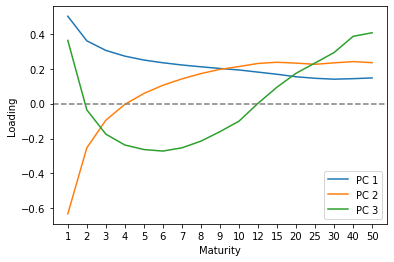

In [35]:
# Plot Single PCs over Time
loadings=pd.DataFrame(EVE)
loadings.columns=swaps.columns
plt.plot(loadings.iloc[:,0:1]*(-1), label='PC 1') #Since the sign of the Eigenvector is ambiguous, we can multiply the the Eigenvector by (-1) for plotting
plt.plot(loadings.iloc[:,1:2], label='PC 2')
plt.plot(loadings.iloc[:,2:3], label='PC 3')
plt.xlabel('Maturity')
plt.ylabel('Loading')
plt.xticks(ticks=range(len(loadings.columns)), labels=loadings.columns)
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.show()